# Fully connected network for image classification

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
mnist_train = pd.read_csv(\
'C:/Users/raze/Documents/Personal/OneDrive/DS/Deep Learning/Ext/\
image-classification-pytorch/datasets/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv(\
'C:/Users/raze/Documents/Personal/OneDrive/DS/Deep Learning/Ext/\
image-classification-pytorch/datasets/mnist-in-csv/mnist_test.csv')

In [54]:
mnist_train.shape , mnist_test.shape

((60000, 785), (10000, 785))

In [55]:
mnist_train.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
6509,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32960,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35716,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20018,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34405,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
mnist_train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [57]:
len(mnist_train)

60000

In [58]:
len(mnist_train[4:5].columns)

785

In [59]:
img = mnist_train[4:5]
img.shape

(1, 785)

In [60]:
img= img.drop('label', axis = 1)

In [61]:
img = img.values

In [62]:
img.shape

(1, 784)

In [63]:
img = img.reshape(1, 28, 28)

img.shape

(1, 28, 28)

In [64]:
len(img[0,0])

28

In [65]:
img=img.squeeze()

In [66]:
img.shape

(28, 28)

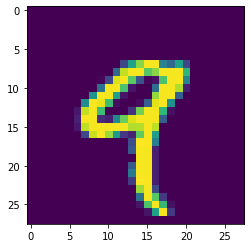

In [67]:
plt.figure(figsize = (4,4))
plt.imshow(img)

## Data Preprocessing

In [68]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

#### Identifying features and labels

In [69]:
mnist_train_features = mnist_train.drop('label', axis = 1)
mnist_train_y = mnist_train['label']
mnist_test_features = mnist_train.drop('label', axis = 1)
mnist_test_y = mnist_train['label']

In [70]:
mnist_test_y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

#### Normalization

In [71]:
mnist_train_features.values.max()

255

In [73]:
mnist_train_features.astype('float32')
mnist_test_features.astype('float32')


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
mnist_train_features = mnist_train_features / 255 # mnist_train_features.values.max()
mnist_test_features = mnist_test_features / 255 # mnist_train_features.values.max()

In [75]:
mnist_train_features.values.max(),mnist_train_features.values.min()

(1.0, 0.0)

#### converting to tensors
* Labels are in one column. Converting that one row but multiple columns (for loss func, target should be a 1D tensor; y vector should be of type long)

In [90]:
import torch

In [83]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
y_train_tensor = torch.tensor(mnist_train_y.values, dtype=torch.long)

X_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)
y_test_tensor = torch.tensor(mnist_test_y.values, dtype=torch.long)

In [93]:
y_train_tensor.dtype

torch.int64

In [94]:
X_test_tensor.dtype

torch.float32

In [95]:
y_test_tensor,y_train_tensor

(tensor([5, 0, 4,  ..., 5, 6, 8]), tensor([5, 0, 4,  ..., 5, 6, 8]))

In [96]:
y_test_tensor.shape, X_train_tensor.shape

(torch.Size([60000]), torch.Size([60000, 784]))

### Defining DNN model and parameters

In [97]:
import torch.nn as nn

In [98]:
input_size = 784
output_size = 10
hidden1_size = 16
hidden2_size = 32

In [136]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden1_size)
        self.fc2 = nn.Linear(hidden1_size,hidden2_size)
        self.fc3 = nn.Linear(hidden2_size,output_size)
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return torch.log_softmax(x, dim =-1)
        

In [137]:
model = Net()

In [138]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
loss_fn = nn.NLLLoss()

### Training

In [144]:
X_train_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [145]:
X_test_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [140]:
epochs = 100
for epoch in range(1,epochs+1):
   optimizer.zero_grad()
   Y_pred = model(X_train_tensor)

   loss = loss_fn(Y_pred,y_train_tensor)
   loss.backward()
   if epoch % 10 == 0:
       print(f'epoch {epoch} - loss: {loss.item()}')
        
   optimizer.step()


epoch 10 - loss: 2.2709827423095703
epoch 20 - loss: 2.223223924636841
epoch 30 - loss: 2.1655313968658447
epoch 40 - loss: 2.0946569442749023
epoch 50 - loss: 2.007572650909424
epoch 60 - loss: 1.9050571918487549
epoch 70 - loss: 1.789038896560669
epoch 80 - loss: 1.6640093326568604
epoch 90 - loss: 1.5326980352401733
epoch 100 - loss: 1.4007138013839722


### Model Evaluation - mode

In [141]:
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [143]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score

In [149]:
correct = 0
total = 0
output = model(X_test_tensor)
output.shape, X_test_tensor.shape

(torch.Size([60000, 10]), torch.Size([60000, 784]))

In [150]:
torch.max(output)

tensor(-0.6769, grad_fn=<MaxBackward1>)

In [170]:
 _, predicted = torch.max(output,1)


In [171]:
output

tensor([[-2.4779, -2.6293, -2.5889,  ..., -2.6014, -2.3800, -3.1241],
        [-0.7408, -4.4878, -3.3357,  ..., -4.3820, -2.2301, -3.9426],
        [-3.9506, -2.0371, -2.6089,  ..., -1.6288, -3.4941, -1.5415],
        ...,
        [-2.3744, -2.0895, -3.3543,  ..., -2.8150, -1.5773, -3.0811],
        [-1.6446, -3.9400, -2.0752,  ..., -3.5478, -2.7489, -2.9512],
        [-1.4987, -2.8822, -2.9808,  ..., -3.3138, -1.6525, -3.1276]],
       grad_fn=<LogSoftmaxBackward>)

In [172]:
_

tensor([-1.2174, -0.7408, -1.5415,  ..., -1.3188, -1.1095, -1.4987],
       grad_fn=<MaxBackward0>)

In [173]:
predicted

tensor([3, 0, 9,  ..., 5, 6, 0])

In [174]:
y_test_tensor.numpy()

tensor([5, 0, 4,  ..., 5, 6, 8])

In [194]:
print("Accuracy: ", accuracy_score(predicted, y_test_tensor))
print("Precision: ", precision_score(predicted, y_test_tensor, average='weighted'))
print("Recall: ", recall_score(predicted, y_test_tensor, average='weighted'))

Accuracy:  0.7213
Precision:  0.7698342627096331
Recall:  0.7213


### Using model for predictions 

In [201]:
mnist_test_y[1003]

1

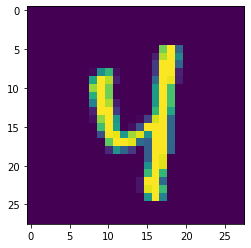

In [230]:
sample_img = mnist_test_features.values[1006]
sample_img = sample_img.reshape(1, 28, 28)
sample_img = sample_img[0,:,:]
plt.imshow(sample_img)

In [231]:
sample = mnist_test_features.values[1006]

In [232]:
sample = torch.Tensor(sample)

In [233]:
sample.dtype, type(sample)

(torch.float32, torch.Tensor)

In [234]:
y_pred = model(sample)
y_pred

tensor([-3.1331, -2.0452, -2.5384, -2.7791, -1.5870, -3.3871, -2.6596, -2.0711,
        -2.7341, -1.6785], grad_fn=<LogSoftmaxBackward>)

In [235]:
_, predict = torch.max(y_pred,-1)
predict.item()

4